In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm
from tqdm.autonotebook import tqdm
tqdm.pandas()

import numpy as np
import arpa

#import pynlpl.lm.lm as pyn
#import pynlpl.lm.srilm as pynLM

import torch.nn as nn
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

/home/werner/.local/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


GeForce GTX 1060 6GB
True


# Load NNs

In [2]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(4, 4)
        #self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 3)
        self.fc4 = nn.Linear(3, 1)

        
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x)) 
        x = torch.sigmoid(self.fc4(x)) 
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 1)

        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x)) 
        return x   

net1 = Net1().cuda()
net1.load_state_dict(torch.load('NN saves/4431_lr=0.03_MAE'))
print(net1.eval())

net2 = Net2().cuda()
net2.load_state_dict(torch.load('NN saves/5541_NN'))
print(net2.eval())

Net1(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (fc4): Linear(in_features=3, out_features=1, bias=True)
)
Net2(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)


In [4]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

inpt = torch.tensor([[50, 3, 50, 1000, 1000]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
print('Custom prob: ' + str(out))
print('MLE:' + str(inpt[0][0]/inpt[0][1]))

Custom prob: 0.048909347504377365
MLE:tensor(0.0600, device='cuda:0')


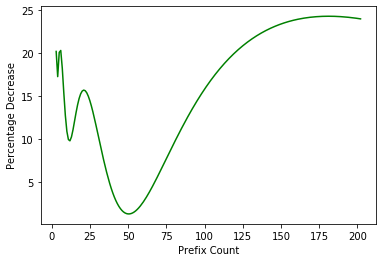

In [13]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

l =200

outs = np.zeros(l)
mle = np.zeros(l)
x_axis = np.zeros(l)
prc = np.zeros(l)

for i in range(l):
    x = i + 3
    inpt = torch.tensor([[x , 2, x, 10000, 10000]],device=device).float()
    mle[i] = inpt[0][1]/inpt[0][0]
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    prc[i] = 100*(mle[i]-outs[i])/mle[i]

plt.plot(x_axis, prc, c = 'green')
plt.ylabel('Percentage Decrease')
plt.xlabel('Prefix Count')
plt.show()
#plt.plot(x_axis, outs, c = 'blue')
#plt.plot(x_axis, mle, c = 'red')
#plt.show()

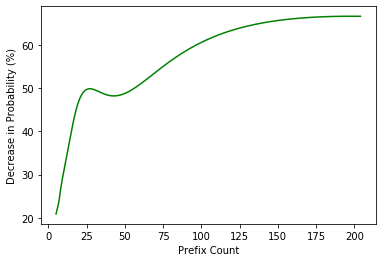

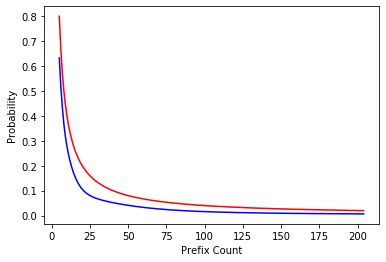

In [16]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

l = 200

outs = np.zeros(l)
mle = np.zeros(l)
x_axis = np.zeros(l)
prc = np.zeros(l)

for i in range(l):
    x = i + 5
    inpt = torch.tensor([[x , 4, 4, 10000, 10000]],device=device).float()
    mle[i] = inpt[0][1]/inpt[0][0]
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    prc[i] = 100*(mle[i]-outs[i])/mle[i]

plt.plot(x_axis, prc, c = 'green')
plt.ylabel('Decrease in Probability (%)')
plt.xlabel('Prefix Count')
plt.show()
plt.plot(x_axis, outs, c = 'blue')
plt.plot(x_axis, mle, c = 'red')
plt.ylabel('Probability')
plt.xlabel('Prefix Count')
plt.show()

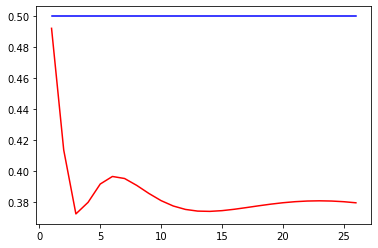

In [79]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

l = 26

outs = np.zeros(l)
mle = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    x = i + 1
    inpt = torch.tensor([[x*2 , x*1, x*2, 10000, 10000]],device=device).float()
    mle[i] = inpt[0][1]/inpt[0][0]
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x


plt.plot(x_axis, outs, c = 'red')
plt.plot(x_axis, mle, c = 'blue')
plt.show()

0.05444709681872111
0.06492747792898154
0.07229727970232312


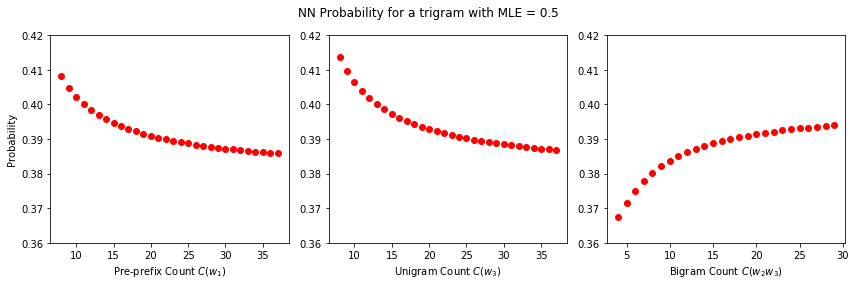

In [15]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

fig, (ax2, ax3, ax1) = plt.subplots(1, 3,figsize=(12,4))

#############################################################################################################
l = 30

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):

    x = 8 + i
    inpt = torch.tensor([[8 ,4, 8, 1000, x]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    
print((outs[0]-outs[-1])/outs[0])

ax2.set(xlabel = 'Pre-prefix Count $C(w_{1})$', ylabel='Probability')
ax2.scatter(x_axis, outs, c = 'red')
#ax2.set(xlim = [3,30], ylim = [0.62,0.9])
ax2.set(ylim = [0.36,0.42])

        
#############################################################################################################
l = 30
outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    x = 8 + i
    inpt = torch.tensor([[8, 4, 8, x, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x

print((outs[0]-outs[-1])/outs[0])

ax3.set(xlabel = 'Unigram Count $C(w_{3})$')
ax3.scatter(x_axis, outs, c = 'red')
#ax3.set(xlim = [3,30], ylim = [0.62,0.9])
ax3.set(ylim = [0.36,0.42])


#############################################################################################################
l = 26

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    x = 4 + i
    inpt = torch.tensor([[8 , 4, x, 1000, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x

print((outs[-1]-outs[0])/outs[0])

ax1.set(xlabel = 'Bigram Count $C(w_{2}w_{3})$')
ax1.scatter(x_axis, outs, c = 'red')
#ax1.set(xlim = [3,30], ylim = [0.60,0.9])
ax1.set(ylim = [0.36,0.42])

#############################################################################################################


#plt.title('Output probability scaling the following inputs one at a time')
#ax2.set(title ='Output probability scaling the following inputs one at a time')
plt.tight_layout()
plt.suptitle('NN Probability for a trigram with MLE = ' + str(float((inpt[0][0]/inpt[0][1]))))
plt.subplots_adjust(top=0.88)
plt.show()


0.4095257188239739
0.007746443929870989
0.00010430426919126173


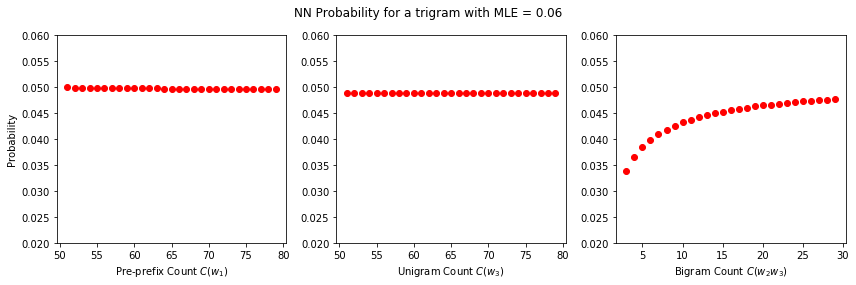

In [17]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

fig, (ax2, ax3, ax1) = plt.subplots(1, 3,figsize=(12,4))
l = 27

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    x = 3 + i
    inpt = torch.tensor([[50 , 3, x, 1000, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x

print((outs[-1]-outs[0])/outs[0])

ax1.set(xlabel = 'Bigram Count $C(w_{2}w_{3})$')
ax1.scatter(x_axis, outs, c = 'red')
#ax1.axis([1, 17, 0.024, 0.039])
#ax1.set(xlim = [0,16] , ylim = [0.15,0.22])
ax1.set(ylim = [0.02,0.06])

#############################################################################################################
l = 29

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):

    x = 51 + i
    inpt = torch.tensor([[50 , 3, 50, 1000, x]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    
print((outs[0]-outs[-1])/outs[-1])

ax2.set(xlabel = 'Pre-prefix Count $C(w_{1})$', ylabel='Probability')
ax2.scatter(x_axis, outs, c = 'red')
#ax2.axis([1, 17, 0.03, 0.0475])
#ax2.set(xlim = [0,16] , ylim = [0.15,0.22])
ax2.set(ylim = [0.02,0.06])
        
#############################################################################################################
l = 29
outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    x = 51 + i
    inpt = torch.tensor([[50 , 3, 50, x, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x

print((outs[-1]-outs[0])/outs[0])

ax3.set(xlabel = 'Unigram Count $C(w_{3})$')
ax3.scatter(x_axis, outs, c = 'red')
#ax3.axis([0, 16, 0.018, 0.025])
#ax3.set(xlim = [0,16] , ylim = [0.15,0.22])
ax3.set(ylim = [0.02,0.06])

#############################################################################################################

#plt.title('Output probability scaling the following inputs one at a time')
#ax2.set(title ='Output probability scaling the following inputs one at a time')
plt.tight_layout()
plt.suptitle('NN Probability for a trigram with MLE = 0.06')
plt.subplots_adjust(top=0.88)
plt.show()


0.21268354443803572


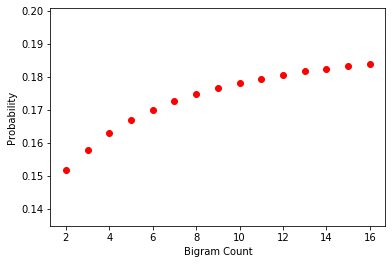

In [12]:
l = 15

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    #print(i)
    x = 2 + i
    #print(x)
    inpt = torch.tensor([[10 , 2, x, 1000, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x

#print(x_axis)
#print(outs)

print((outs[-1]-outs[0])/outs[0])
plt.ylabel('Probability')
plt.xlabel('Bigram Count')
plt.scatter(x_axis, outs, c = 'red')
#plt.axis([1, 17, 0.024, 0.039])
#plt.show()

0.04984105733231088


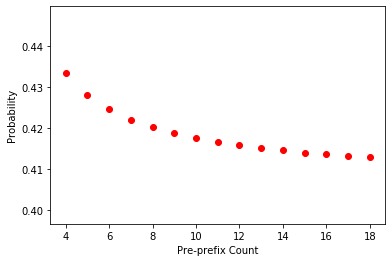

In [31]:
l = 15

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):

    x = 4 + i
    inpt = torch.tensor([[4 , 2, 3, 1000, x]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    
plt.ylabel('Probability')
plt.xlabel('Pre-prefix Count')
#plt.plot(x_axis,outs, 'red')

print((outs[0]-outs[-1])/outs[-1])
plt.scatter(x_axis, outs, c = 'red')
#plt.axis([1, 17, 0.03, 0.0475])

plt.show()

-0.269112450958216


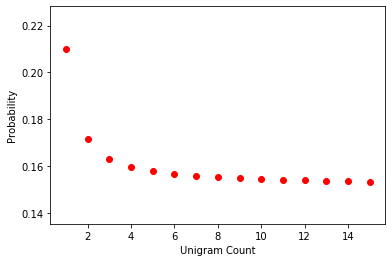

In [43]:
l = 15

outs = np.zeros(l)
x_axis = np.zeros(l)

for i in range(l):
    #print(i)
    x = 1 + i
    inpt = torch.tensor([[10 , 2, 2, x, 1000]],device=device).float()
    inpt = 1/inpt
    outs[i] = float(net2(inpt))
    x_axis[i] = x
    
plt.ylabel('Probability')
plt.xlabel('Unigram Count')
#plt.plot(x_axis,outs, 'red')

print((outs[-1]-outs[0])/outs[0])
plt.scatter(x_axis, outs, c = 'red')
#plt.axis([0, 16, 0.018, 0.025])

plt.show()

# Retrieve probs from LM

In [37]:
#lm = arpa.loadf('../../rsc/nnLM-rn.arpa')[0]
lm = arpa.loadf('../../rsc/smoothedLM.arpa')[0]


# NN LM

In [36]:
print('Pnn(SHOW | THE, RESULTS) = {:.3e}'.format(lm.p("THE RESULTS SHOW")))
print('Pnn(SHOW | OUR, RESULTS) = {:.3e}'.format(lm.p("OUR RESULTS SHOW")))

print('\nPnn(HOW | RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW HOW")))
print('Pnn(AN | RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW AN")))
print('Pnn(A | RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW A")))


Pnn(SHOW | THE, RESULTS) = 1.093e-02
Pnn(SHOW | OUR, RESULTS) = 2.600e-02

Pnn(HOW | RESULTS, SHOW) = 4.149e-03
Pnn(AN | RESULTS, SHOW) = 1.532e-03
Pnn(A | RESULTS, SHOW) = 3.300e-02


#  Baseline LM

In [38]:
print('Pgt(SHOW | THE, RESULTS) = {:.3e}'.format(lm.p("THE RESULTS SHOW")))
print('Pgt(SHOW | OUR, RESULTS) = {:.3e}'.format(lm.p("OUR RESULTS SHOW")))


print('\nPgt(HOW | RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW HOW")))
print('Pgt(A| RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW A")))
print('Pgt(AN | RESULTS, SHOW) = {:.3e}'.format(lm.p("RESULTS SHOW AN")))


Pgt(SHOW | THE, RESULTS) = 1.093e-02
Pgt(SHOW | OUR, RESULTS) = 2.707e-02

Pgt(HOW | RESULTS, SHOW) = 3.842e-03
Pgt(A| RESULTS, SHOW) = 4.237e-02
Pgt(AN | RESULTS, SHOW) = 1.418e-03


# NN LM

In [4]:
print('\nUnseen:\nPnn(CONTENT | ARE, YOU) = {:.3e}'.format(lm.p("ARE YOU CONTENT")))
print('\nSeen:\nPnn(HAPPY | ARE, YOU) = {:.3e}'.format(lm.p("ARE YOU HAPPY")))



Unseen:
Pnn(CONTENT | ARE, YOU) = 1.172e-06

Seen:
Pnn(HAPPY | ARE, YOU) = 2.697e-03


#  Baseline LM

In [5]:
print('\nUnseen:\nPgt(CONTENT | ARE, YOU) = {:.3e}'.format(lm.p("ARE YOU CONTENT")))
print('\nSeen:\nPgt(HAPPY | ARE, YOU) = {:.3e}'.format(lm.p("ARE YOU HAPPY")))



Unseen:
Pgt(CONTENT | ARE, YOU) = 1.150e-06

Seen:
Pgt(HAPPY | ARE, YOU) = 2.697e-03


# Back of trigram probs - NN LM

In [23]:
print('\nUnseen:\nPnn(ARE | <s>, I) = {:.3e}'.format(lm.p("<s> I ARE")))
print('\nSeen:\nPnn(AM | <s>, I) = {:.3e}'.format(lm.p("<s> I AM")))

print('\nUnseen:\nPnn(NEW | I, ARE) = {:.3e}'.format(lm.p("I ARE NEW")))
print('\nSeen:\nPnn(NEW | I, AM) = {:.3e}'.format(lm.p("I AM NEW")))



Unseen:
Pnn(ARE | <s>, I) = 3.747e-04

Seen:
Pnn(AM | <s>, I) = 8.602e-02

Unseen:
Pnn(NEW | I, ARE) = 3.960e-04

Seen:
Pnn(NEW | I, AM) = 4.308e-04


# Back of trigram probs - Baseline LM

In [4]:
print('\nUnseen:\nPgt(ARE | <s>, I) = {:.3e}'.format(lm.p("<s> I ARE")))
print('\nSeen:\nPgt(AM | <s>, I) = {:.3e}'.format(lm.p("<s> I AM")))

print('\nUnseen:\nPgt(NEW | I, ARE) = {:.3e}'.format(lm.p("I ARE NEW")))
print('\nSeen:\nPgt(NEW | I, AM) = {:.3e}'.format(lm.p("I AM NEW")))


Unseen:
Pgt(ARE | <s>, I) = 3.747e-04

Seen:
Pgt(AM | <s>, I) = 8.602e-02

Unseen:
Pgt(NEW | I, ARE) = 3.432e-04

Seen:
Pgt(NEW | I, AM) = 4.308e-04


# FIRST AID COURSE VS FIRST AID BOOK

### Baseline LM probabilities

In [5]:
#r = 3,4
print('\nSeen:\nPgt(BOOK | FIRST, AID) = ' + str(lm.p("FIRST AID BOOK")))
print('\nSeen:\nPgt(COURSE | FIRST, AID) = ' + str(lm.p("FIRST AID COURSE")))



Seen:
Pgt(BOOK | FIRST, AID) = 0.0060508028112207695

Seen:
Pgt(COURSE | FIRST, AID) = 0.011336134759718165


In [6]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#of lot of

#4
inpt = torch.tensor([[13748 , 2, 2, 140621]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.699058*4/8))

#5
inpt = torch.tensor([[13748 , 2, 2, 140621,485140]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(2/13748))


NN discounted prob: 0.001029077684506774
Discounted prob from test set: 0.349529

NN 'true' MLE: 0.0006252916064113379
MLE from test set: 0.00014547570555717196


In [7]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#of lot of

#4
inpt = torch.tensor([[13748 , 2, 2, 1233800]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.699058*4/8))

#5
inpt = torch.tensor([[8 , 4, 10899, 1233800, 485140]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(4/8))


NN discounted prob: 0.356179416179657
Discounted prob from test set: 0.349529

NN 'true' MLE: 0.39923760294914246
MLE from test set: 0.5


# THAT WE YOU | TRUST (above threshold)

### Baseline LM probabilities

In [3]:
#r = 4
print('\nSeen:\nPgt(YOU | THAT, WE) = ' + str(lm.p("THAT WE YOU")))
print('\nSeen:\nPgt(TRUST | THAT, WE) = ' + str(lm.p("THAT WE TRUST")))



Seen:
Pgt(YOU | THAT, WE) = 7.482091242109651e-05

Seen:
Pgt(TRUST | THAT, WE) = 7.482091242109651e-05


In [7]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#THAT WE YOu

#4
inpt = torch.tensor([[13748 , 2, 2, 140621]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.514319*2/13748))

#5
inpt = torch.tensor([[13748 , 2, 2, 140621,485140]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(2/13748))


NN discounted prob: 0.001029077684506774
Discounted prob from test set: 7.482091940645912e-05

NN 'true' MLE: 0.0006252916064113379
MLE from test set: 0.00014547570555717196


In [8]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#THAT WE TRUST

#4
inpt = torch.tensor([[13748 , 2, 2, 1233800]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.514319*2/13748))

#5
inpt = torch.tensor([[8 , 4, 10899, 1233800, 485140]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(2/13748))


NN discounted prob: 0.0010290865320712328
Discounted prob from test set: 7.482091940645912e-05

NN 'true' MLE: 0.39923784136772156
MLE from test set: 0.00014547570555717196


# OF LOT OF

### Baseline LM probabilities

In [4]:
#r = 4
print('\nSeen:\nPgt(OF | OF, LOT) = ' + str(lm.p("OF LOT OF")))



Seen:
Pgt(OF | OF, LOT) = 0.3495290688391094


### nn LM probabilities

In [14]:
#r = 4
print('\nSeen:\nPgt(OF | OF, LOT) = ' + str(lm.p("OF LOT OF")))



Seen:
Pgt(OF | OF, LOT) = 0.2790902084194964


In [7]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)
 
#of lot of

#4
inpt = torch.tensor([[8 , 4, 10899, 1233800]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.699058*4/8))

#5
inpt = torch.tensor([[8 , 4, 10899, 1233800, 1233800]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(4/8))


NN discounted prob: 0.356179416179657
Discounted prob from test set: 0.349529

NN 'true' MLE: 0.39923760294914246
MLE from test set: 0.5


# < S > RECORDS WERE


### Baseline LM probabilities

In [7]:
#r = 3
print('\nSeen:\nPgt(WERE | <S>, RECORDS) = ' + str(lm.p("<s> RECORDS WERE")))



Seen:
Pgt(WERE | <S>, RECORDS) = 0.041894402415892346


### NN LM probabilities

In [15]:
#r = 3
print('\nSeen:\nPgt(WERE | <S>, RECORDS) = ' + str(lm.p("<s> RECORDS WERE")))



Seen:
Pgt(WERE | <S>, RECORDS) = 0.034175352281856454


In [3]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)
#<s> RECORDS WERE

#4
inpt = torch.tensor([[46 , 3, 56, 169063]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.642381*3/46))

#5
inpt = torch.tensor([[46 , 3, 56, 169063, 3041784]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(3/46))


NN discounted prob: 0.042336732149124146
Discounted prob from test set: 0.04189441304347826

NN 'true' MLE: 0.05320101976394653
MLE from test set: 0.06521739130434782


# FOR TOP END - FOR TOP EIGHT

### Baseline LM probabilities

In [8]:
#r = 6
print('\nSeen:\nPgt(END | FOR, TOP) = ' + str(lm.p("FOR TOP END")))
print('Pgt(EIGHT | FOR, TOP) = ' + str(lm.p("FOR TOP EIGHT")))



Seen:
Pgt(END | FOR, TOP) = 0.017307486439031208
Pgt(EIGHT | FOR, TOP) = 0.017307486439031208


In [14]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#FOR TOP END

#4
inpt = torch.tensor([[285 , 6, 181, 25932]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.822105*6/285))

#5
inpt = torch.tensor([[285 , 6, 181, 25932, 518703]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(6/285))


NN discounted prob: 0.013832397758960724
Discounted prob from test set: 0.017307473684210525

NN 'true' MLE: 0.015356296673417091
MLE from test set: 0.021052631578947368


In [15]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#FOR TOP EIGHT 

#4
inpt = torch.tensor([[285 , 6, 1077, 95973]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str( 0.822105*6/285))

#5
inpt = torch.tensor([[285 , 6, 1077, 95973, 518703]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(6/285))


NN discounted prob: 0.01384296640753746
Discounted prob from test set: 0.017307473684210525

NN 'true' MLE: 0.01569429226219654
MLE from test set: 0.021052631578947368


# JOBS FOR MONEY - VS JOBS FOR CASH

### Baseline LM probabilities

In [6]:
print('Unseen during training, present in test:\nPgt(POSTS | JOBS, FOR) = ' + str(lm.p("JOBS FOR POSTS")))
print('\nSeen:\nPgt(MONEY | JOBS, FOR) = ' + str(lm.p("JOBS FOR MONEY")))
print('Pgt(CASH | JOBS, FOR) = ' + str(lm.p("JOBS FOR CASH")))
#r = 2


Unseen during training, present in test:
Pgt(POSTS | JOBS, FOR) = 5.6950009387085187e-05

Seen:
Pgt(MONEY | JOBS, FOR) = 0.0019743538911290324
Pgt(CASH | JOBS, FOR) = 0.0019743538911290324


In [6]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#jobs for cash

#4
inpt = torch.tensor([[521 , 2, 183, 6568]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.514319*2/521))

#5
inpt = torch.tensor([[521 , 2, 183, 6568, 8975]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(2/521))


NN discounted prob: 0.0017973959911614656
Discounted prob from test set: 0.001974353166986564

NN 'true' MLE: 0.00404265196993947
MLE from test set: 0.003838771593090211


In [25]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#jobs for money

#4
inpt = torch.tensor([[521 , 2, 771, 28811]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.514319*2/521))

#5
inpt = torch.tensor([[521 , 2, 771, 28811, 8975]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(2/521))


NN discounted prob: 0.0017989537445828319
Discounted prob from test set: 0.001974353166986564

NN 'true' MLE: 0.004089356865733862
MLE from test set: 0.003838771593090211


# NN results, taking training set inputs:

In [ ]:
#TRIGRAM
# JOBS FOR MONEY - 0
# JOBS FOR POSTS - 2
# JOBS FOR CASH - 1

#PREFIX
# JOBS FOR - 8

#(N-1)-GRAM
#FOR MONEY - 11
#FOR CASH - 1
#FOR POSTS - 2

#(N-2)-GRAM
# MONEY - 474
# CASH - 125
# POSTS - 83

#PRE-PREFIX
# JOBS - 147

In [23]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - (pre-prefix)

#jobs for posts
inpt = torch.tensor([[8 , 1, 2 , 83 ]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.3*1/8))



inpt = torch.tensor([[8 , 1, 2 , 83 , 147]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(1/8))


NN discounted prob: 0.065711610019207
Discounted prob from test set: 0.0375

NN 'true' MLE: 0.15154613554477692
MLE from test set: 0.125


In [17]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - pre-prefix

#jobs for cash
inpt = torch.tensor([[8 , 1, 1 , 125 ]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0.3*1/8))



inpt = torch.tensor([[8 , 1, 1 , 125 , 147]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(1/8))


NN discounted prob: 0.06568172574043274
Discounted prob from test set: 0.0375

NN 'true' MLE: 0.1473076343536377
MLE from test set: 0.125


In [31]:
#prefix - trigram - (n-1)-gram - (n-2)-gram - pre-prefix

#jobs for money
inpt = torch.tensor([[8, 0, 11 , 474 ]],device=device).float()
inpt = 1/inpt
out = float(net1(inpt))
#print(float(out))

print('NN discounted prob: ' + str(out))
print('Discounted prob from test set: ' + str(0/8))



inpt = torch.tensor([[8 , 0, 11 , 474 , 147]],device=device).float()
inpt = 1/inpt
out = float(net2(inpt))
#print(float(out))

print('\nNN \'true\' MLE: ' + str(out))
print('MLE from test set: ' + str(0/8))


NN discounted prob: 6.656724167442007e-07
Discounted prob from test set: 0.0

NN 'true' MLE: 2.4396895241807215e-06
MLE from test set: 0.0


# Grabbing probs directly from ARPA

In [17]:
file = '../../rsc/smoothedLM.arpa'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
count = 0

for i in range(0,6):
    first_read.readline()

for x in tqdm(first_read, total=num_lines):
    if x[0] != '\\' and x != '\n':

        line = x.split('\t')
        ngram = line[1].split(' ')
        tuple_size = len(ngram)
        
        if line[1] == 'JOBS FOR MONEY\n':
            print(line)
            print(10**float(line[0]))
            
        if line[1] == 'JOBS FOR CASH\n':
            print(line)
            print(10**float(line[0]))
            
        if line[1] == 'JOBS FOR POSTS\n':
            print(line)
            print(10**float(line[0]))
            
        if line[1] == 'FOR POSTS':
            print(line)
            print(10**float(line[0]))
            
        if line[1] == 'JOBS FOR':
            print(line)
            print(10**float(line[0]))            


['-3.936768', 'FOR POSTS', '-0.214438\n']
0.00011567300020419949
['-1.236197', 'JOBS FOR', '-0.3077382\n']
0.05805010371421239
['-2.704575', 'JOBS FOR CASH\n']
0.0019743538911290324
['-2.704575', 'JOBS FOR MONEY\n']
0.0019743538911290324



# Counts, from training set:

In [11]:
file = '../../rsc/13_14_counts.txt'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
count = 0

for x in tqdm(first_read, total=num_lines):
    
    line = x.split('\t')
    ngram = line[0].split(' ')
    tuple_size = len(ngram)

    if line[0] == 'THAT WE TRUST':
        print(line)

    if line[0] == 'THAT WE':
        print(line)

    if line[0] == 'WE TRUST':
        print(line)
        
    if line[0] == 'THAT':
        print(line)

    if line[0] == 'TRUST':
        print(line)    

Widget Javascript not detected.  It may not be installed or enabled properly.


['THAT', '485140\n']
['THAT WE', '13748\n']
['THAT WE TRUST', '2\n']
['TRUST', '5670\n']
['WE TRUST', '152\n']


# load counts to dictionary

In [3]:
file = '../../rsc/13_14_counts.txt'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))

ngram_dict = {}
for x in tqdm(first_read, total=num_lines, position=0, leave=True):
    line = x.split('\t')
    r = int(line[-1])
    ngram_dict[line[0]] = r


In [4]:
file = '../../rsc/13_14_counts.txt'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
count = 0

bigram_over_prefix = 0
trigrams = 0

for x in tqdm(first_read, total=num_lines):
    
    line = x.split('\t')
    ngram = line[0].split(' ')
    tuple_size = len(ngram)
    r = int(line[1])
    
    if tuple_size == 3 :

        trigrams += 1
        prefix = ngram_dict[ngram[0] + ' ' + ngram[1]] 
        bigram = ngram_dict[ngram[1] + ' ' + ngram[2]]
        unigram = ngram_dict[ngram[2]]
        preprefix = ngram_dict[ngram[0]] 
               
        if bigram > prefix:
            bigram_over_prefix += 1
        
        #if prefix < 5 and preprefix > 100000 and bigram > 10000:
            #print(ngram)
            #print(r)
            
        #if bigram < 5 and unigram > 10000 and prefix > 100 and preprefix >10000:
            #print(ngram)


In [5]:
print(bigram_over_prefix/trigrams)

0.474326471993575


# pull counts for certain ngrams

In [18]:
file = '../../rsc/13_14_counts.txt'
first_read = open(file ,'r')

num_lines = sum(1 for line in open(file,'r'))
count = 0

for x in tqdm(first_read, total=num_lines):
    
    line = x.split('\t')
    ngram = line[0].split(' ')
    tuple_size = len(ngram)
    r = int(line[1])
    
                
    if tuple_size == 1 :
        if ngram[0] == 'OF':
            print(line)
        if ngram[0] == 'TOP':
            print(line)
        if ngram[0] == 'FOR':
            print(line)
        if ngram[0] == 'RECORDS':
            print(line)
        if ngram[0] == 'LOT':
            print(line)
    '''
    
    if tuple_size == 3 :
        if ngram[1] == 'RESULTS' and ngram[2] == 'SHOW':
            print(line)
    
    if line[0] == 'OUR RESULT SHOWS':
            print(line)
        if line[0] == 'THE RESULT SHOWS':
            print(line)


    if tuple_size == 2 :
        if ngram[0] == 'FOR' and ngram[1] == 'MONEY':
            print(line)
            
        if ngram[0] == 'FOR' and ngram[1] == 'CASH':
            print(line)
            
        if ngram[0] == 'JOBS' and ngram[1] == 'FOR':
            print(line)
            
    if tuple_size == 1 :
        if ngram[0] == 'JOBS':
            print(line)
        if ngram[0] == 'MONEY':
            print(line)
        if ngram[0] == 'CASH':
            print(line)
            
            

    
    if tuple_size == 2 :
        if ngram[0] == 'FOR' and ngram[1] == 'TOP' and ngram[2] == 'AM':
            print(line)
            
    if r < 8 and tuple_size == 3 and r!=1:

        prefix = ngram_dict[ngram[0] + ' ' + ngram[1]]  #prefix count
        bigram = ngram_dict[ngram[1] + ' ' + ngram[2]]  #backoff bigram count
        unigram = ngram_dict[ngram[2]]                   #unigram count
        preprefix = ngram_dict[ngram[0]]                   #pre-prefix count
        
        #if r == 5 and bigram > 10000 and bigram < 100000:
            #print(ngram)
        
        #if prefix < 5 and preprefix > 100000 and bigram > 10000:
            #print(ngram)
            #print(r)
            
        #if bigram < 5 and unigram > 10000 and prefix > 100 and preprefix >10000:
            #print(ngram)
    '''

['FOR', '518703\n']
['LOT', '17432\n']
['OF', '1233800\n']
['RECORDS', '2554\n']
['TOP', '31686\n']

